# Background

Project ini merupakan projek akhir sebagai Data Scientist Project-Based Intern di ID/X Partners. Saya diminta terlibat
dalam sebuah proyek Credit Risk dari perusahaan multifinance.

## Problem
Client  ingin meningkatkan keakuratan
dalam menilai dan mengelola risiko kredit, sehingga dapat
mengoptimalkan keputusan bisnis mereka dan mengurangi potensi
kerugian.

## Goals
Mengembangkan model machine learning
yang dapat memprediksi risiko kredit (credit risk) berdasarkan
dataset yang disediakan, yang mencakup data pinjaman yang
disetujui dan ditolak

## Data
Data yang digunakan bernama data `loan_data_2007_2014.csv`  yang berasal dari client

# Import Library

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# 1. Data Understanding

## Import Dataset

In [13]:
%cd /content/drive/My Drive
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample(5)

/content/drive/My Drive


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
182597,182597,2285380,2707583,21000,21000,21000.0,36 months,12.12,698.71,B,...,NaN,NaN,NaN,NaN,NaN,NaN,69500.0,NaN,NaN,NaN
282967,282967,30845741,33398905,7200,7200,7200.0,36 months,8.39,226.92,A,...,NaN,NaN,NaN,NaN,NaN,NaN,5800.0,NaN,NaN,NaN
50291,50291,9676496,11528255,20000,20000,20000.0,36 months,8.90,635.07,A,...,NaN,NaN,NaN,NaN,NaN,NaN,13300.0,NaN,NaN,NaN
182213,182213,2295309,2727496,20000,20000,20000.0,36 months,18.49,727.98,D,...,NaN,NaN,NaN,NaN,NaN,NaN,22400.0,NaN,NaN,NaN
307485,307485,27730334,30233400,5000,5000,5000.0,36 months,12.49,167.25,B,...,NaN,NaN,NaN,NaN,NaN,NaN,32700.0,NaN,NaN,NaN


In [14]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
118795,118795,6135033,7617199,10000,10000,10000.0,36 months,15.22,347.74,C,...,NaN,NaN,NaN,NaN,NaN,NaN,15300.0,NaN,NaN,NaN
230404,230404,1074617,1310301,16450,16450,16450.0,60 months,20.89,444.02,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28868,28868,532050,687778,6000,6000,6000.0,60 months,10.38,128.61,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379897,379897,17683266,19815809,35000,35000,34950.0,36 months,14.49,1204.57,C,...,NaN,NaN,NaN,NaN,NaN,NaN,12400.0,NaN,NaN,NaN
44940,44940,10086210,9112773,4675,4675,4675.0,36 months,22.90,180.73,E,...,NaN,NaN,NaN,NaN,NaN,NaN,22600.0,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Data yang digunakan bernama `loan_data_2007_2014.csv`. Data tersebut memiliki 73 feature (21 Feature Kategorikal dan 52 Feature Numerical) dengan 1 target (**loan_status**) dengan 466285 baris data

Variable Information <br>
**id** : A unique LC assigned ID for the loan listing	(ID unik yang ditetapkan LC untuk daftar pinjaman). <br>
**member_id** : A unique LC assigned Id for the borrower member (LC unik yang **menetapkan** Id untuk anggota peminjam) <br>
**loan_amnt** : Loan amount (jumlah pinjaman diajukan) <br>
**funded_amnt** : The total amount committed to that loan at that point in time(	Jumlah total yang berkomitmen untuk pinjaman tersebut pada saat itu) <br>
**term** : The number of payments on the loan. Values are in months and can be either 36 or 60.	(Jumlah pembayaran pinjaman. Nilai dalam bulan dan dapat berupa 36 atau 60). <br>
**int_rate** : Indicates if income was verified by LC, not verified, or if the income source was verified.	(Menunjukkan apakah pendapatan telah diverifikasi oleh LC, tidak diverifikasi, atau jika sumber pendapatan telah diverifikasi) <br>
**installment** : The monthly payment owed by the borrower if the loan originates.	(Pembayaran bulanan yang harus dibayar oleh peminjam jika pinjaman itu berasal)<br>
**grade** : LC assigned loan grade	(LC menetapkan tingkat pinjaman)  <br>
**sub_grade** : LC assigned loan subgrade	(LC menetapkan tanah dasar) pinjaman<br>
**emp_title** : The job title supplied by the Borrower when applying for the loan. (Jabatan yang diberikan oleh Peminjam saat mengajukan pinjaman) <br>
**emp_length** :Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 	(Lamanya masa kerja dalam tahun. Nilai yang mungkin adalah antara 0 dan 10 dimana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih). <br>
**home_ownership** : LC assigned loan grade	LC menetapkan tingkat pinjaman
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	(Status kepemilikan rumah yang diberikan oleh peminjam saat pendaftaran. Nilai-nilai kami adalah: SEWA, SENDIRI, KPR, LAINNYA)<br>
**annual_inc** :The self-reported annual income provided by the borrower during registration. (penghasilan tahunan)<br>
**verification_status** :Status proses pinjaman <br>
**issue_d** : The month which the loan was funded	(Bulan dimana pinjaman itu didanai)<br>
**loan_status** : Current status of the loan	(Status pinjaman saat ini)<br>
**pymnt_plan** : payment plant (Rencana pembayaran)<br>
**url** :URL for the LC page with listing data.	(URL untuk halaman LC dengan data daftar)<br>
**desc** :Loan description provided by the borrower	(Deskripsi pinjaman yang diberikan oleh peminjam)<br>
**purpose** : A category provided by the borrower for the loan request. 	(Kategori yang disediakan oleh peminjam untuk permintaan pinjaman)<br>
**title** : The loan title provided by the borrower	(Judul pinjaman yang diberikan oleh peminjam) <br>
**zip_code** : The first 3 numbers of the zip code provided by the borrower in the loan application.	(3 angka pertama kode pos yang diberikan peminjam dalam permohonan pinjaman) <br>
**addr_state** : The state provided by the borrower in the loan application	(Negara yang disediakan oleh peminjam dalam permohonan pinjaman) <br>
**dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.<br>
**delinq_2yrs** : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	(Jumlah tunggakan tunggakan lebih dari 30 hari dalam arsip kredit peminjam selama 2 tahun terakhir)<br>
**earliest_cr_line** : The month the borrower's earliest reported credit line was opened	(Bulan dimana batas kredit peminjam yang paling awal dilaporkan dibuka)<br>
**inq_last_6mths** : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	Jumlah pertanyaan dalam 6 bulan terakhir (tidak termasuk pertanyaan otomotif dan hipotek)<br>
**mths_since_last_delinq** : The number of months since the borrower's last delinquency.	(Jumlah bulan sejak tunggakan terakhir peminjam)<br>
**mths_since_last_record** : The number of months since the last public record.	(Jumlah bulan sejak pencatatan publik terakhir)<br>
**open_acc** : The number of open credit lines in the borrower's credit file.	(Jumlah jalur kredit terbuka dalam file kredit peminjam)<br>
**pub_rec** : Number of derogatory public records	(Jumlah catatan publik yang menghina) <br>
**revol_bal** : Total credit revolving balance	(Total saldo kredit bergulir)<br>
**revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        	(Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap seluruh kredit bergulir yang tersedia)<br>
**total_acc** : The total number of credit lines currently in the borrower's credit file	(Jumlah total batas kredit yang saat ini ada dalam arsip kredit peminjam) <br>
**initial_list_status** : The initial listing status of the loan. Possible values are – Whole, Fractional	(Status pencatatan awal pinjaman. Nilai yang mungkin adalah – Utuh, Pecahan)<br>
**out_prncp** : Remaining outstanding principal for total amount funded	(Sisa pokok terutang untuk jumlah total yang didanai)<br>
**out_prncp_inv** : Remaining outstanding principal for portion of total amount funded by investors	(Sisa pokok terutang untuk sebagian dari jumlah total yang didanai oleh investor)<br>
**total_pymnt** : Payments received to date for total amount funded	(Pembayaran diterima sampai saat ini untuk jumlah total yang didanai)<br>
**total_pymnt_inv** : Payments received to date for portion of total amount funded by investors	(Pembayaran yang diterima sampai saat ini untuk sebagian dari jumlah total yang didanai oleh investor)<br>
**total_rec_prncp** : Principal received to date	(Jumlah pokok pinjaman yang telah diterima hingga saat ini)<br>
**total_rec_int** : Interest received to date	(Bunga yang diterima sampai saat ini)<br>
**total_rec_late_fee** : Late fees received to date	(Biaya keterlambatan diterima sampai saat ini)<br>
**recoveries** : Indicates if a payment plan has been put in place for the loan	(Menunjukkan apakah rencana pembayaran telah diterapkan untuk pinjaman)<br>
**collection_recovery_fee** : post charge off collection fee	(biaya pemulihan penagihan) <br>
**last_pymnt_d** : Last month payment was received	(Pembayaran bulan lalu yang diterima)<br>
**last_pymnt_amnt** : Last total payment amount received	(Jumlah total pembayaran terakhir yang diterima)<br>
**next_pymnt_d** :Next scheduled payment date	(Tanggal pembayaran terjadwal berikutnya)<br>
**last_credit_pull_d** :Last LC Checking credit history (Kapan terkahir LC mengecheck credit history)<br>
**collections_12_mths_ex_med** : Number of collections in 12 months excluding medical collections	(Jumlah penagihan dalam 12 bulan tidak termasuk koleksi medis)<br>
**mths_since_last_major_derog** : Months since most recent 90-day or worse rating	(Bulan sejak rating 90 hari terakhir atau lebih buruk)<br>
**policy_code**  : "publicly available policy_code=1
new products not publicly available policy_code=2"	"policy_code=1 yang tersedia untuk umum
produk baru tidak tersedia untuk umum policy_code=2"<br>
**application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers<br>
**annual_inc_joint** : The combined self-reported annual income provided by the co-borrowers during registration	(Gabungan pendapatan tahunan yang dilaporkan sendiri yang diberikan oleh peminjam bersama pada saat pendaftaran) <br>
**dti_joint** : A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income	(Rasio yang dihitung menggunakan total pembayaran bulanan peminjam bersama atas total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi dengan gabungan pendapatan bulanan yang dilaporkan sendiri oleh peminjam bersama)<br>
**verification_status_joint** : Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified	(Menunjukkan apakah pendapatan bersama peminjam bersama telah diverifikasi oleh LC, tidak diverifikasi, atau jika sumber pendapatan telah diverifikasi)<br>
**acc_now_delinq** : The number of accounts on which the borrower is now delinquent.	(Jumlah rekening dimana peminjam sekarang menunggak) <br>
**tot_coll_amt** : Total collection amounts ever owed	(Total jumlah penagihan yang terutang)<br>
**tot_cur_bal** : Total current balance of all accounts	(Total saldo saat ini dari semua akun) <br>
**open_acc_6m** : Number of open trades in last 6 months	(Jumlah perdagangan terbuka dalam 6 bulan terakhir) <br>
**open_il_6m** : Number of installment accounts opened in past 6 months	Jumlah rekening angsuran yang dibuka dalam 6bulan terakhir <br>
**open_il_12m** : Number of installment accounts opened in past 12 months	(Jumlah rekening angsuran yang dibuka dalam 12 bulan terakhir)<br>
**open_il_24m** : Number of installment accounts opened in past 24 months	(Jumlah rekening angsuran yang dibuka dalam 24 bulan terakhir)<br>
**mths_since_rcnt_il** : Months since most recent installment accounts opened	(Bulan sejak rekening cicilan terakhir dibuka)<br>
**total_bal_il** : Total current balance of all installment accounts	(Total saldo saat ini dari semua rekening angsuran)<br>
**il_util** : Ratio of total current balance to high credit/credit limit on all install acct	(Rasio total saldo saat ini terhadap kredit/batas kredit yang tinggi pada semua akun pemasangan) <br>
**open_rv_12m** : Number of revolving trades opened in past 12 months	(Jumlah perdagangan bergulir yang dibuka dalam 12 bulan terakhir)<br>
**open_rv_24m** : Number of revolving trades opened in past 24 months	(Jumlah perdagangan bergulir yang dibuka dalam 24 bulan terakhir)<br>
**max_bal_bc** : Maximum current balance owed on all revolving accounts	(Saldo terhutang maksimum saat ini pada semua akun bergulir)<br>
**all_util** : Balance to credit limit on all trades	(Saldo hingga batas kredit pada semua perdagangan) <br>
**total_rev_hi_lim** : Total revolving high credit/credit limit	(Total batas kredit/kredit tinggi yang bergulir) <br>
**inq_fi** : Number of personal finance inquiries	(Jumlah pertanyaan keuangan) pribadi<br>
**total_cu_tl** : Number of finance trades	(Jumlah perdagangan keuangan)<br>
**inq_last_12m**  Number of credit inquiries in past 12 months	(Jumlah pertanyaan kredit dalam 12 bulan terakhir)<br>



In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [17]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


After understanding the features, there are several key findings that we can get.

*   Features related to the loan's characteristic: 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'application_type'
*   Features related to the borrower's identity:
'member_id', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'zip_code', 'addr_state', 'dti'
*   Features related to the borrower's loan records:
'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'mths_since_last_major_derog', 'acc_now_delinq'
*   Features related to the current status of the loan (after loan is issued):
'issue_d', 'verification_status', 'initial_list_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'

We recognized that features related to the current status of the loan (such as 'out_prncp', 'total_pymnt', 'recoveries' etc.) contain data leakage. This means these features provide information that would not be available at the time of making a loan decision. For example, knowing that 'out_prncp' is 0 immediately indicates a fully paid loan, leading to artificially high model accuracy. To ensure the model's real-world applicability, we will exclude these columns and focus only on features that are available before the loan is issued.

Therefore, we will drop the features that contain data leakage, retaining only those features that are available before the loan is invested. Additionally, we will also remove features that are irrelevant or have missing values for all rows.

In [18]:
df = df.drop (['Unnamed: 0', 'member_id', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'initial_list_status',
'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'inq_fi', 'total_cu_tl', 'inq_last_12m', 'url', 'desc', 'application_type', 'title', 'emp_title', 'zip_code',
'policy_code', 'verification_status', 'issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d' ], axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  loan_status                  466285 non-null  object 
 13 

We observe that the features 'mths_since_last_delinq', 'mths_since_last_record', and 'mths_since_last_major_derog' have a high proportion of NaN values. In this context, NaN values are generally positive indicators, as they signify the absence of any recent derogatory records in the borrower's credit history. We can transform this features later

## Transform Target Column

In [20]:
df.loan_status.value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


The target column in our dataset has nine values. To build a predictive model for credit risk, we need to classify these values into two categories: 'Good' and 'Bad'. <br>

Good Loan : Fully paid, Does not meet the credit policy. Status:Fully Paid (Even not meet company credit policy, borrower still paid fully). <br>
Bad Loan : Charged Off, Late (31-120 days), Late (16-30 days), Default, Does not meet the credit policy. Status:Charged Off.

We will not classify 'Current' and 'In Grace Period' as either 'Good' or 'Bad' loans. This is because we need to observe the final outcome of each loan to accurately assess the risk. We cannot use data where the borrower's status is still uncertain, as we cannot make assumptions about whether they will eventually repay the loan.

In [21]:

# Drop data rows that have 'Current' and 'In Grace Period' Value
drop_values = ['Current', 'In Grace Period']
df_credit = df[~df['loan_status'].isin(drop_values)]

# Update feature target
df_credit['loan_status'] = df_credit['loan_status'].replace({'Fully Paid': 'Good',
                                                         'Does not meet the credit policy. Status:Fully Paid': 'Good',
                                                         'Charged Off' : 'Bad',
                                                         'Late (31-120 days)': 'Bad',
                                                         'Late (16-30 days)': 'Bad',
                                                         'Default': 'Bad',
                                                         'Does not meet the credit policy. Status:Charged Off' : 'Bad'})

In [22]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238913 entries, 0 to 466283
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           238913 non-null  int64  
 1   loan_amnt                    238913 non-null  int64  
 2   funded_amnt                  238913 non-null  int64  
 3   funded_amnt_inv              238913 non-null  float64
 4   term                         238913 non-null  object 
 5   int_rate                     238913 non-null  float64
 6   installment                  238913 non-null  float64
 7   grade                        238913 non-null  object 
 8   sub_grade                    238913 non-null  object 
 9   emp_length                   229688 non-null  object 
 10  home_ownership               238913 non-null  object 
 11  annual_inc                   238909 non-null  float64
 12  loan_status                  238913 non-null  object 
 13  purp

Now we only have 238913 row data

# Exploratory Data Analysis

## Target Distribution

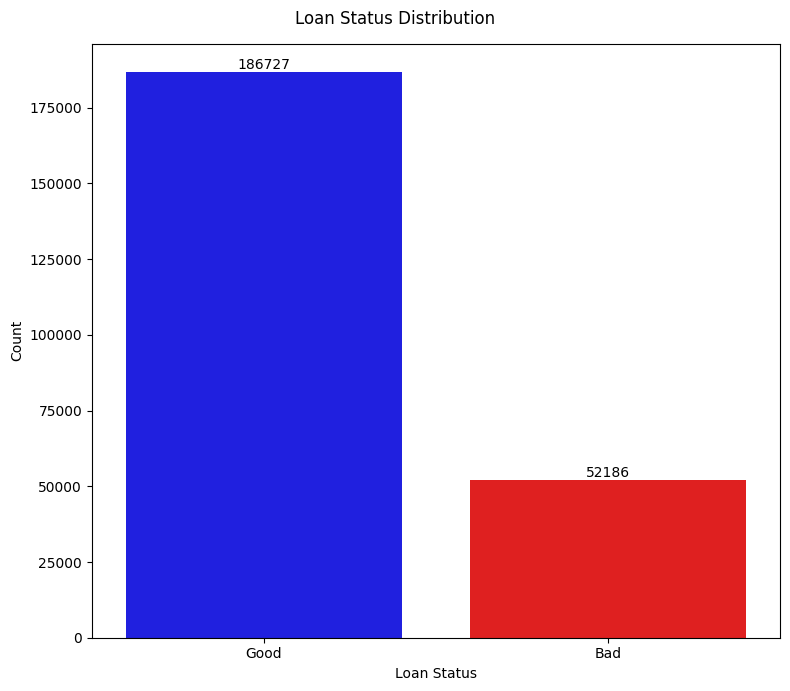

In [23]:
counts = df_credit['loan_status'].value_counts()

plt.figure(figsize=(8, 7))

# Create the bar plot and store the container
ax = sns.barplot(x=counts.index, y=counts, palette=['blue', 'red'])

# Iterate through the patches in the container
for p, label in zip(ax.patches, counts):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.suptitle('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Our target class is imbalanced. We can address this later. After this we go through step EDA on Numerical Feature, Categorical and Datetime

## Numerical Features

In [24]:
numerical_columns = df_credit.select_dtypes(exclude=['object']).columns
numerical_columns = numerical_columns[numerical_columns != 'id']
print(numerical_columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


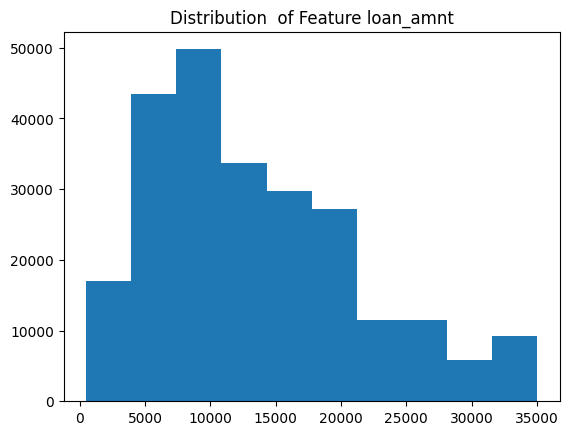

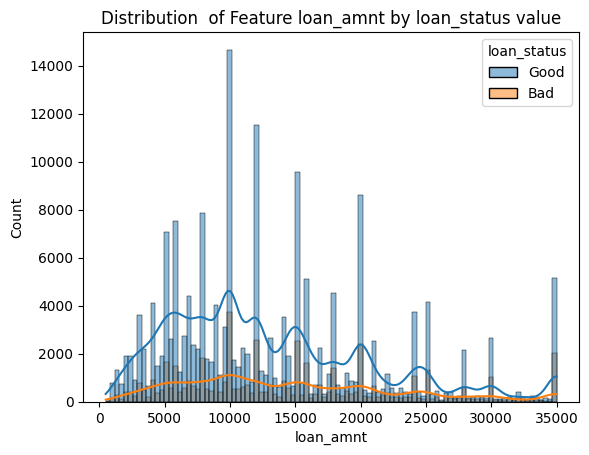

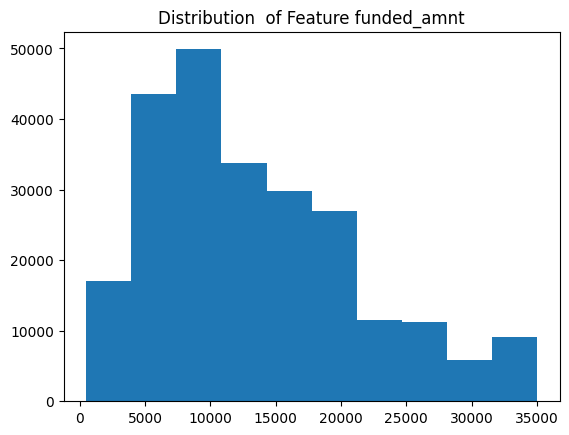

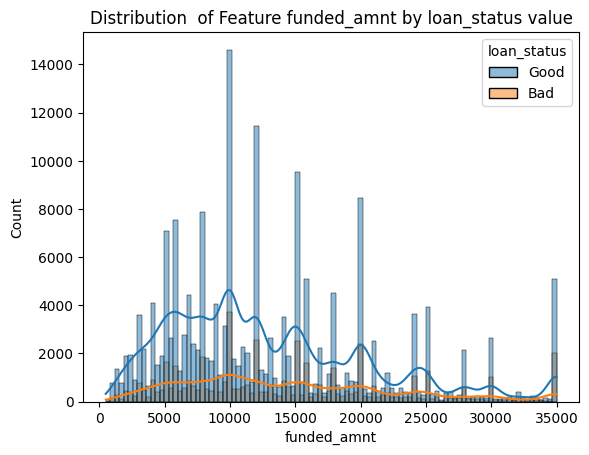

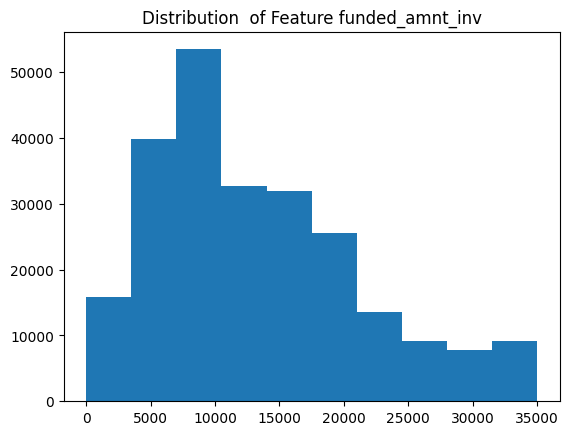

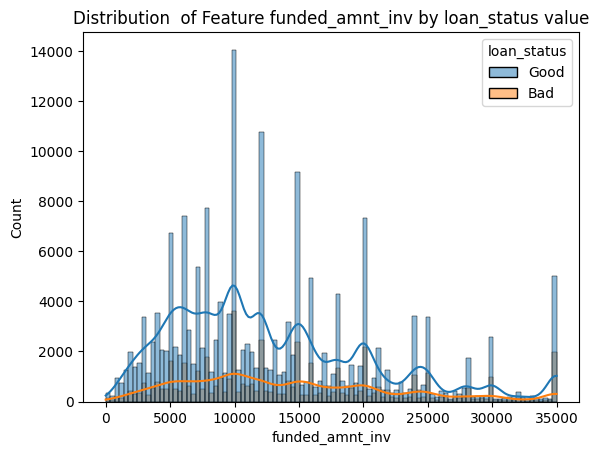

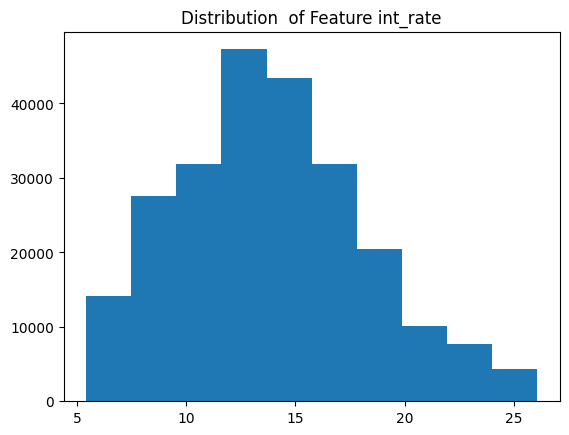

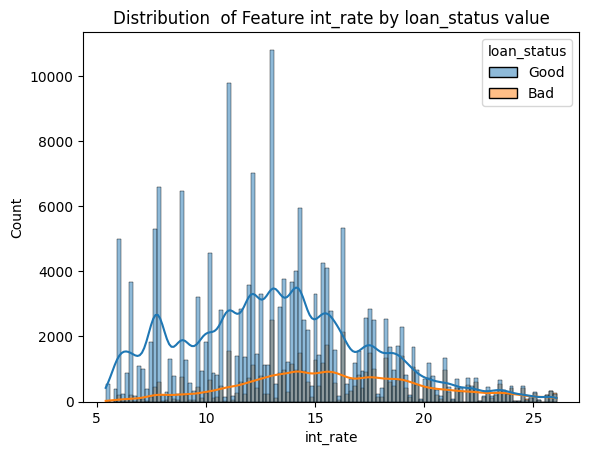

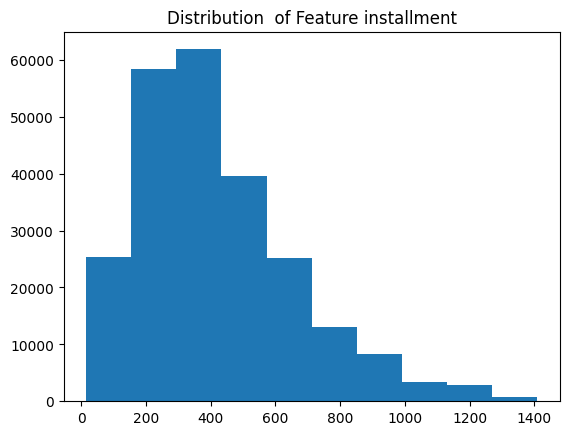

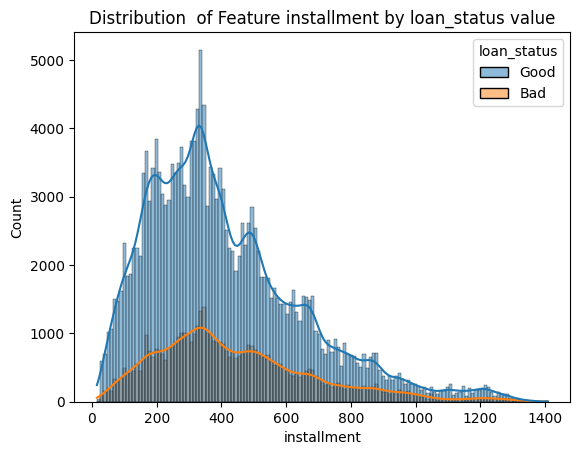

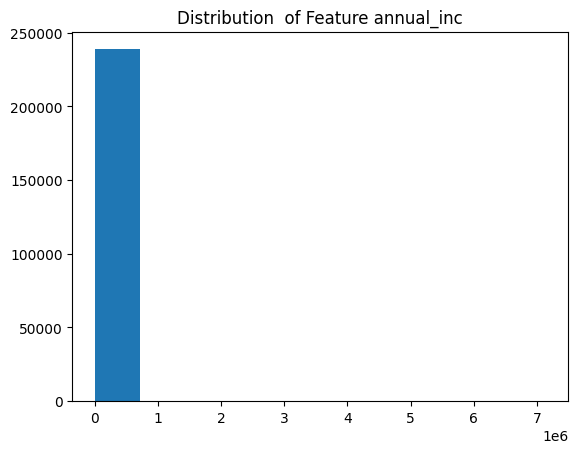

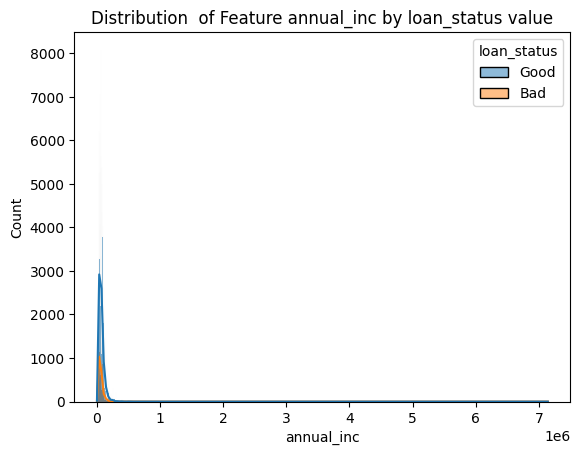

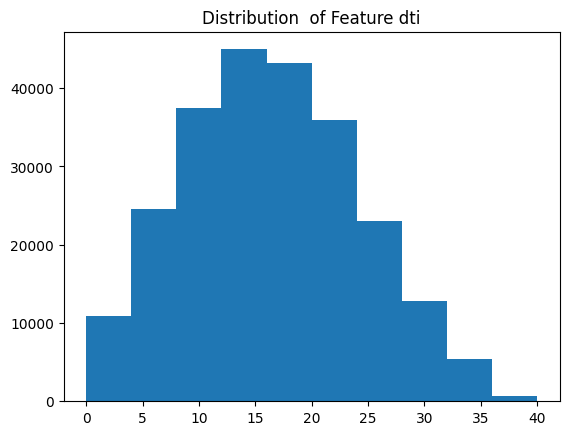

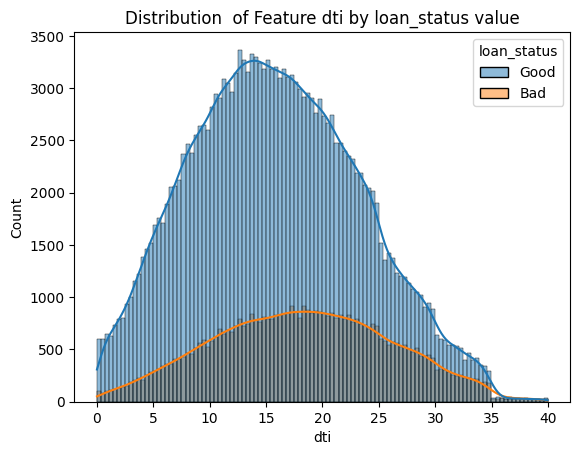

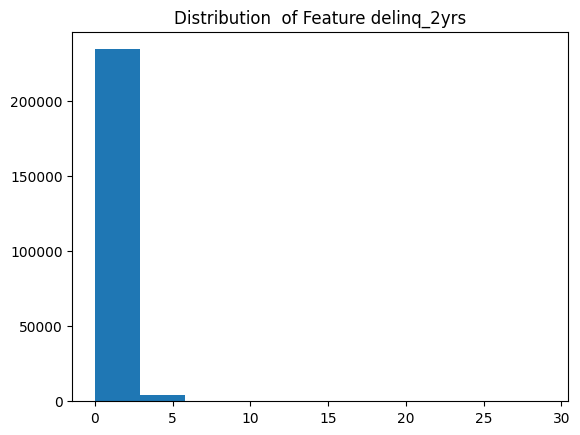

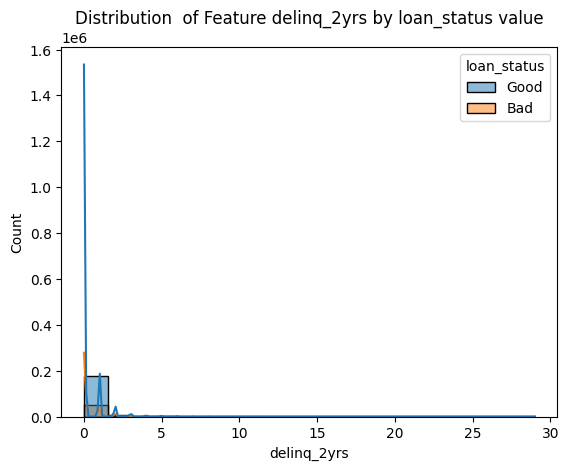

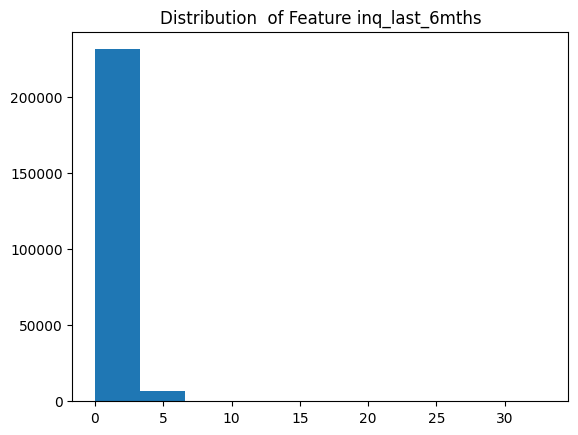

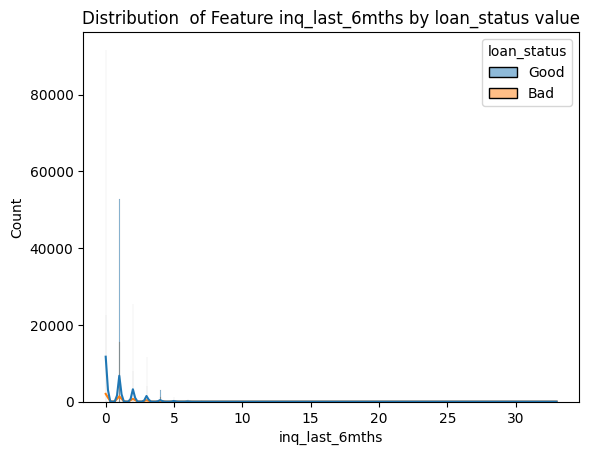

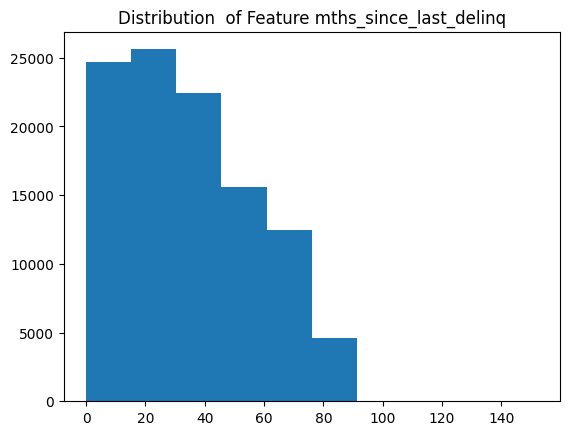

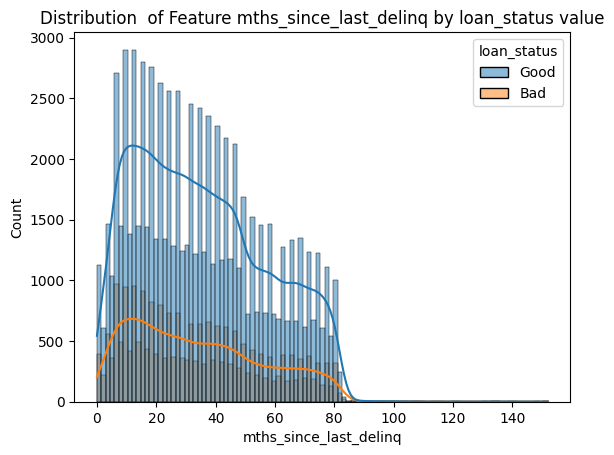

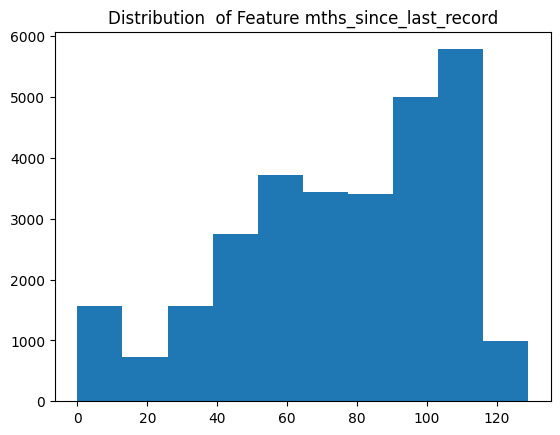

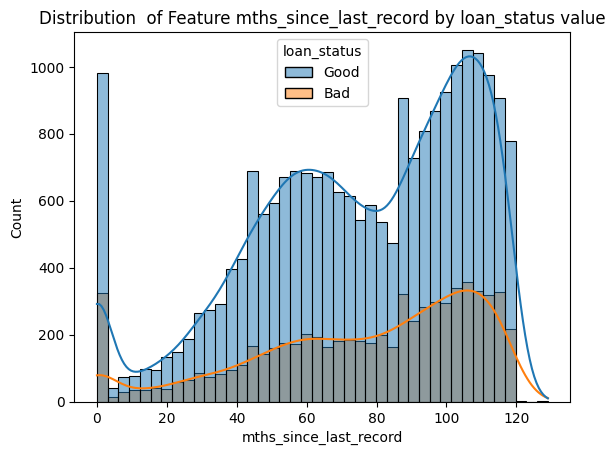

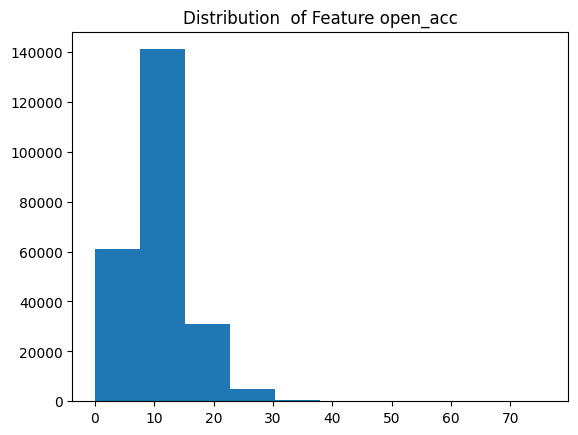

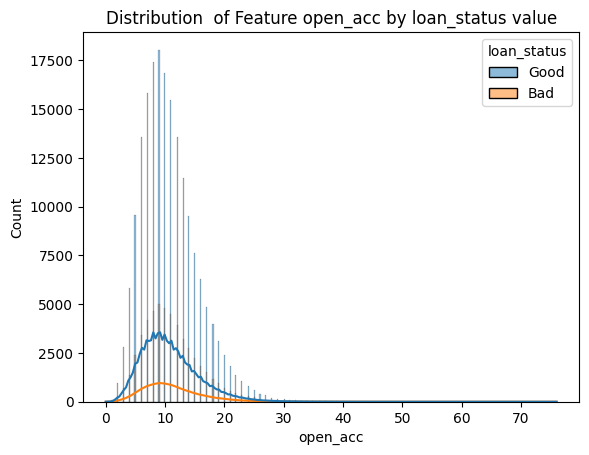

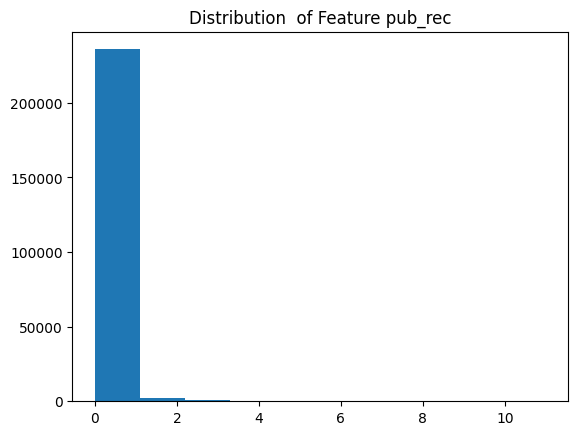

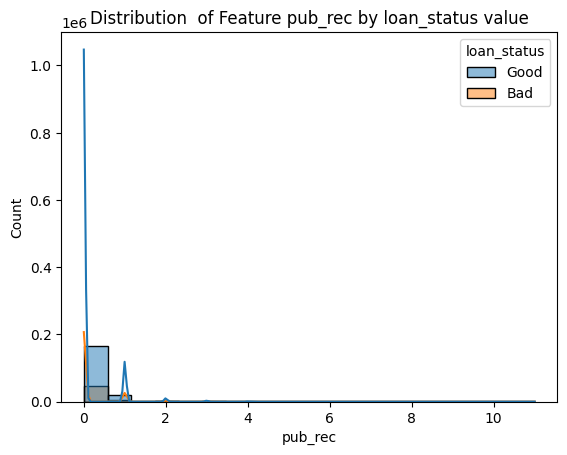

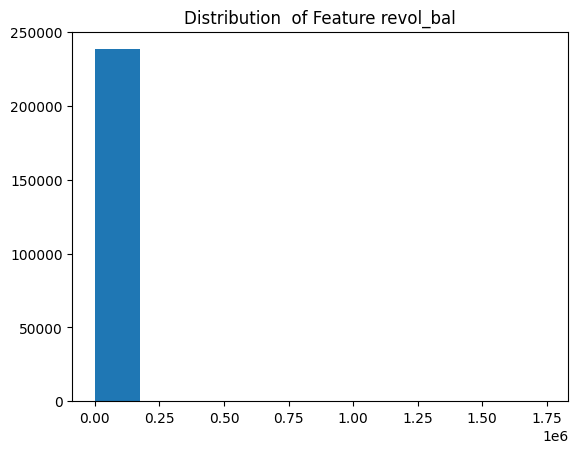

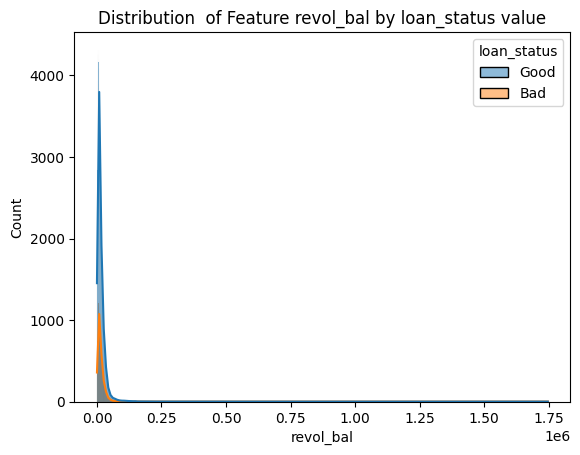

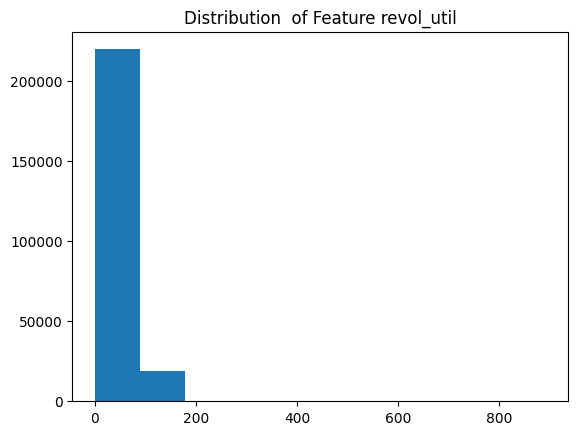

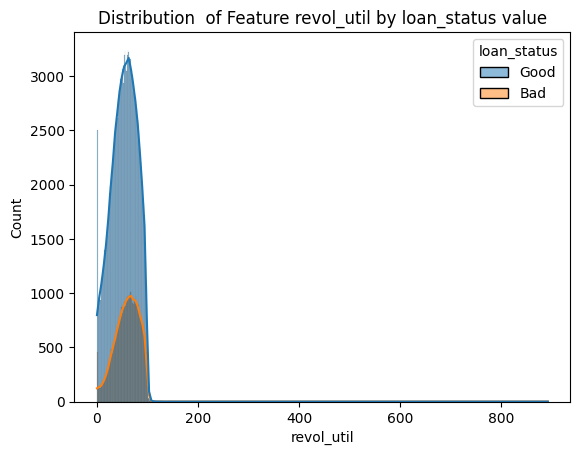

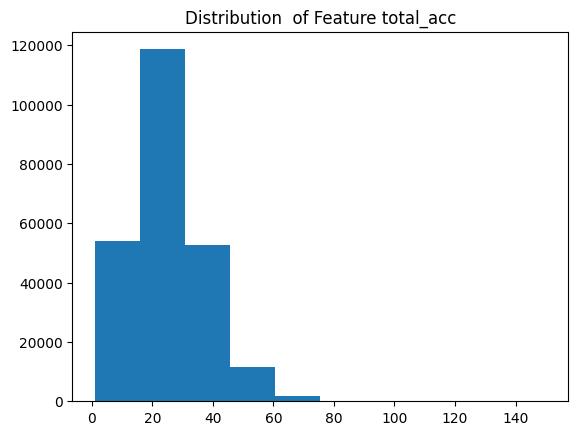

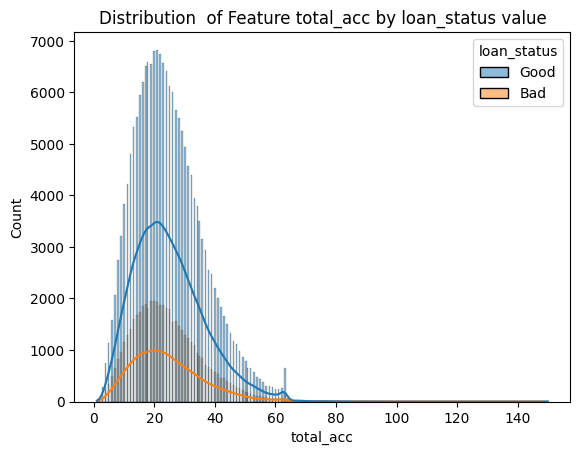

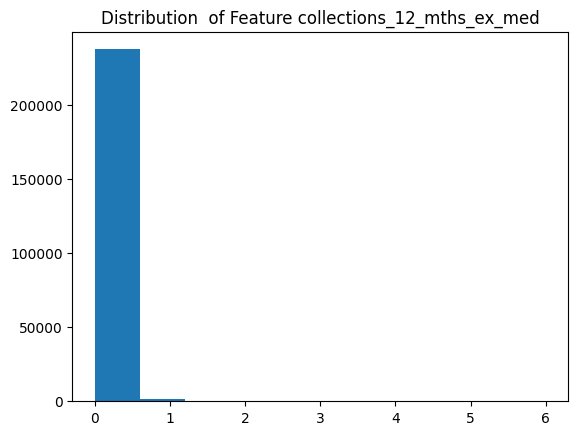

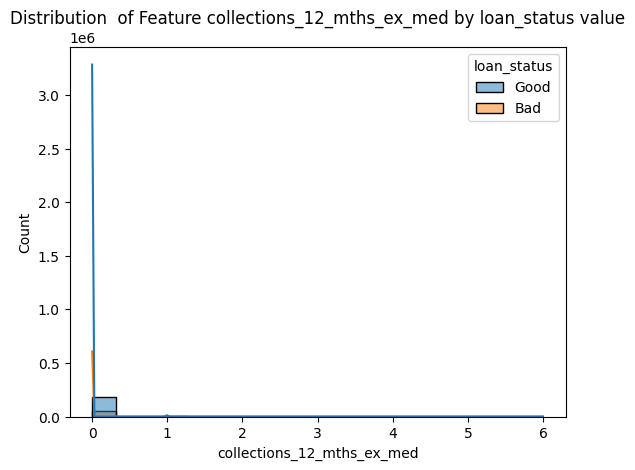

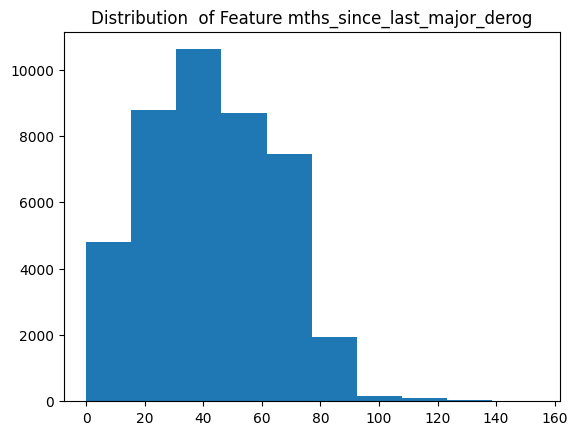

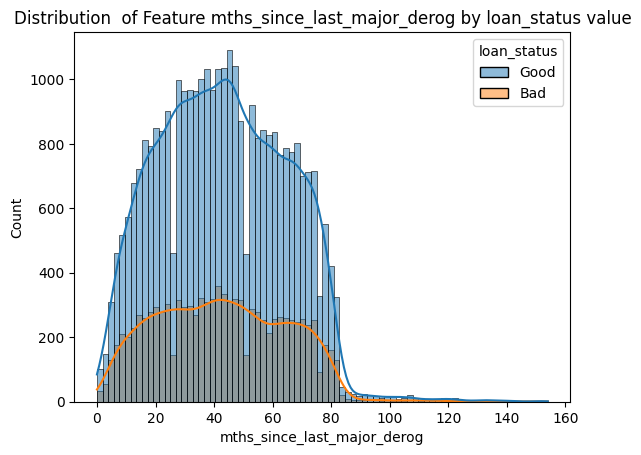

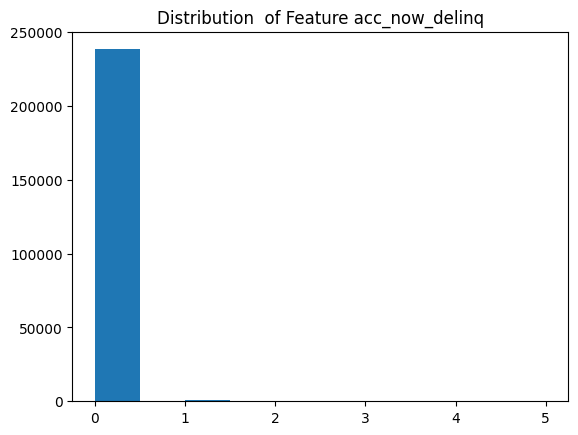

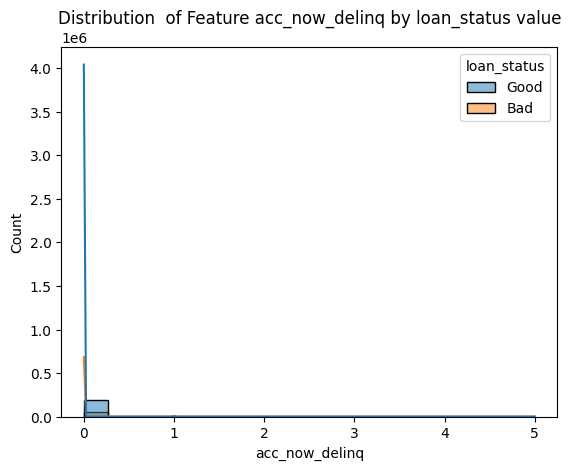

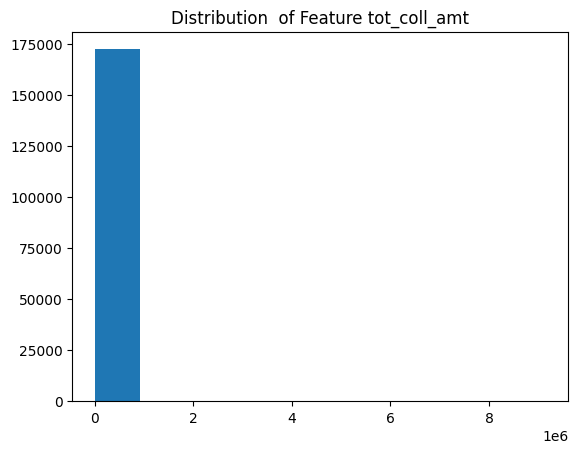

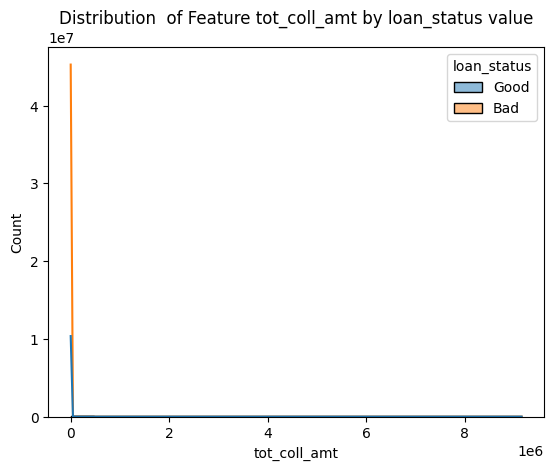

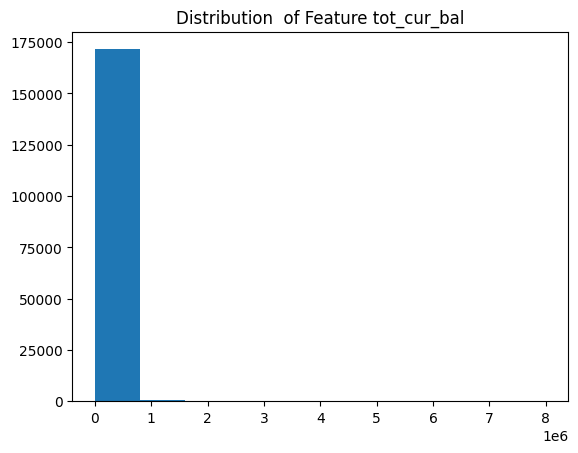

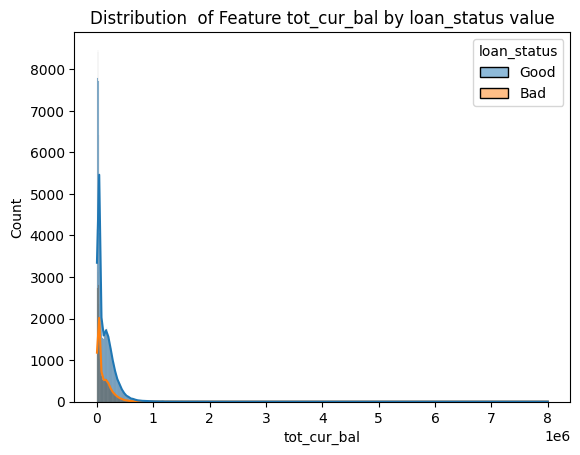

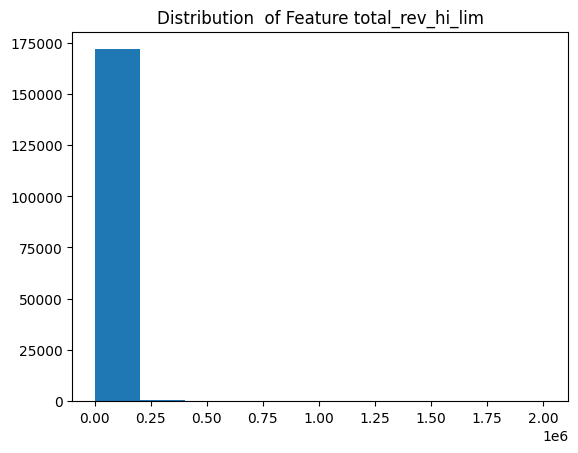

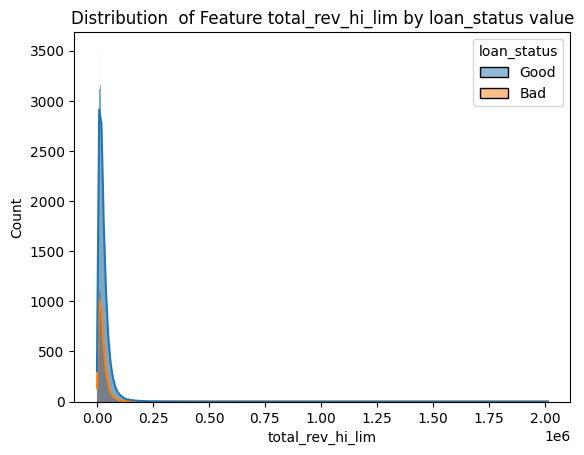

In [25]:
for column in numerical_columns: # Iterate directly over the Index object
    plt.hist(df_credit[column])
    plt.title(f'Distribution  of Feature {column}')
    plt.show()
    sns.histplot(data=df_credit, x=column, hue='loan_status', kde=True)
    plt.title(f'Distribution  of Feature {column} by loan_status value')
    plt.show()

Proporsi bisa dilihat yang punya record buruk loan memiliki potensi bad loan lebih besar

In [26]:
df_credit['loan_status'] = df_credit['loan_status'].map({'Bad': 0, 'Good': 1})

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


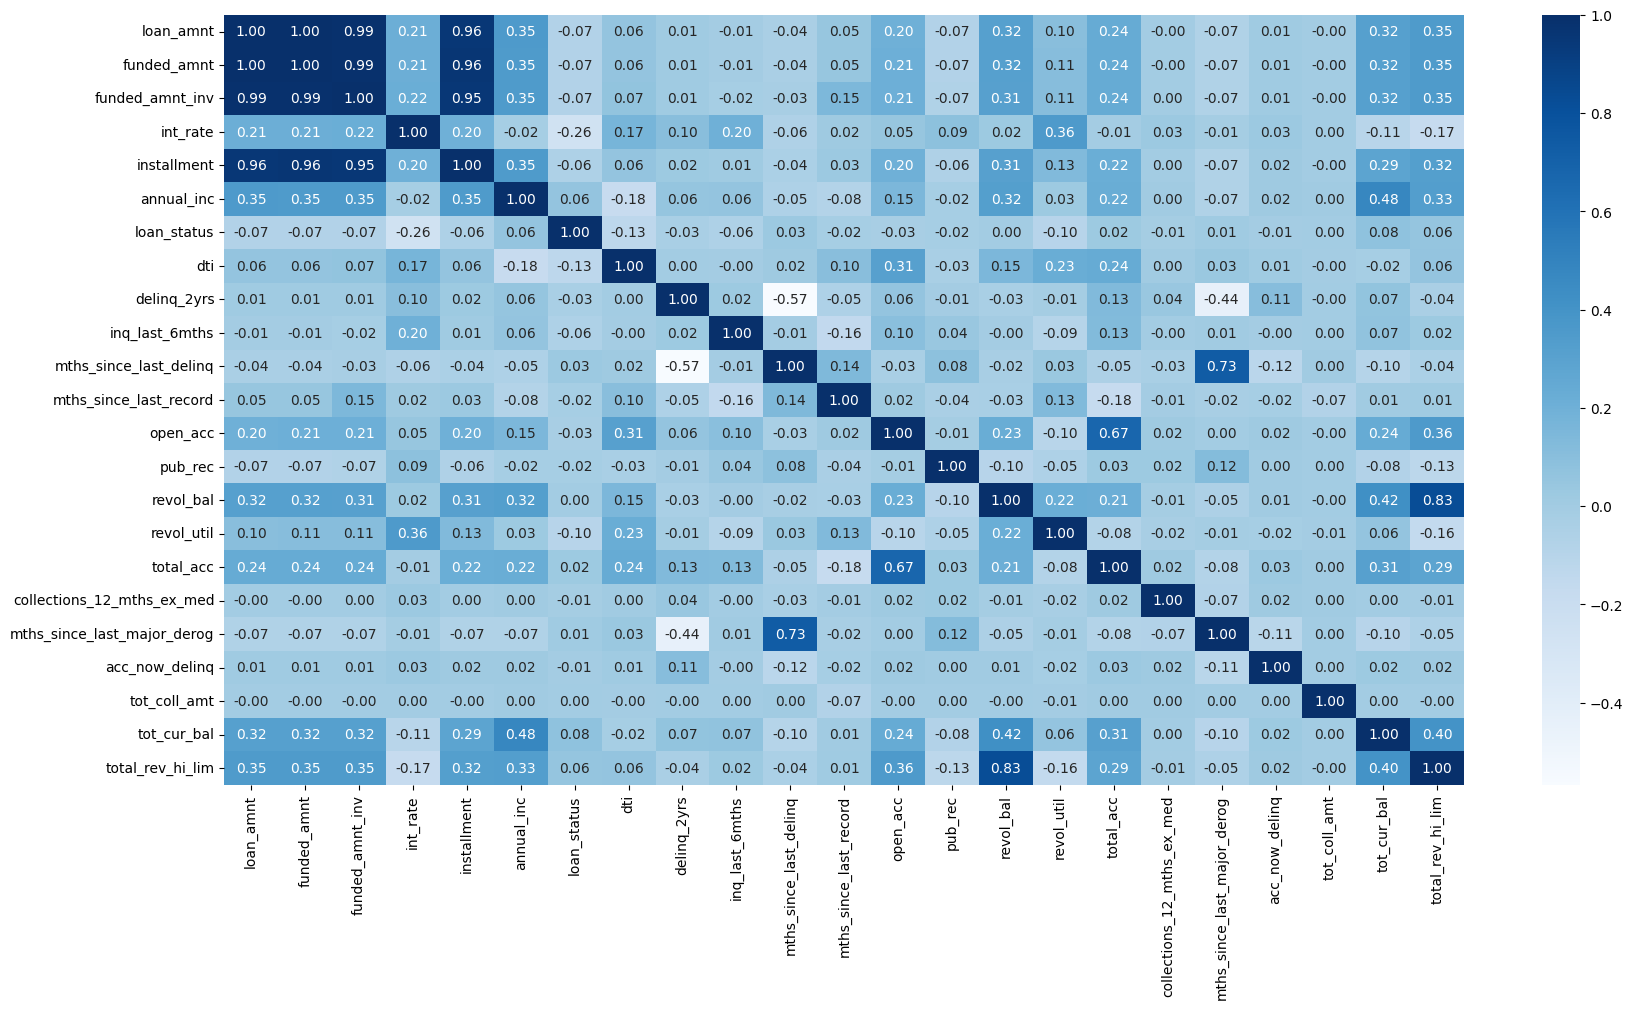

In [27]:
numerical_columns = df_credit.select_dtypes(exclude=['object']).columns
numerical_columns = numerical_columns[numerical_columns != 'id']
print(numerical_columns)

plt.figure(figsize=(20, 10))
# Calculate the correlation on the DataFrame, selecting only numerical columns:
sns.heatmap(df_credit[numerical_columns].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Conclusion :

## Categorical Feature

In [28]:
categorical_columns = df_credit.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d'],
      dtype='object')


In [29]:
df_credit[categorical_columns].describe().T

,count,unique,top,freq
term,238913,2,36 months,186469
grade,238913,7,B,72239
sub_grade,238913,35,B3,17375
emp_length,229688,11,10+ years,71312
home_ownership,238913,6,MORTGAGE,117376
purpose,238913,14,debt_consolidation,139085
addr_state,238913,50,CA,40550
earliest_cr_line,238884,634,Oct-00,2033
last_credit_pull_d,238890,103,Jan-16,101680


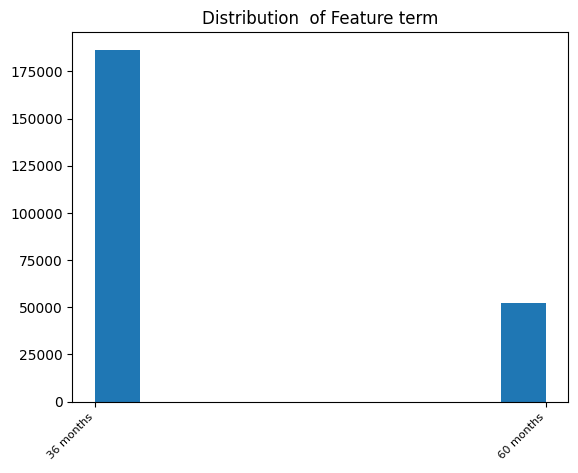

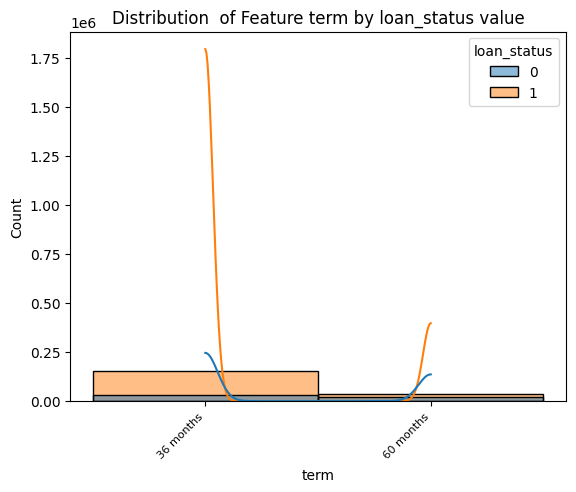

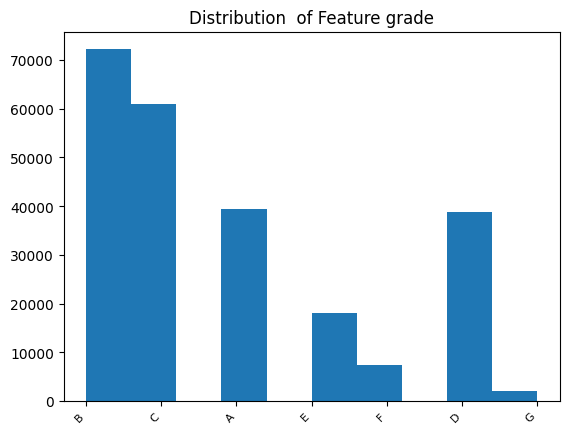

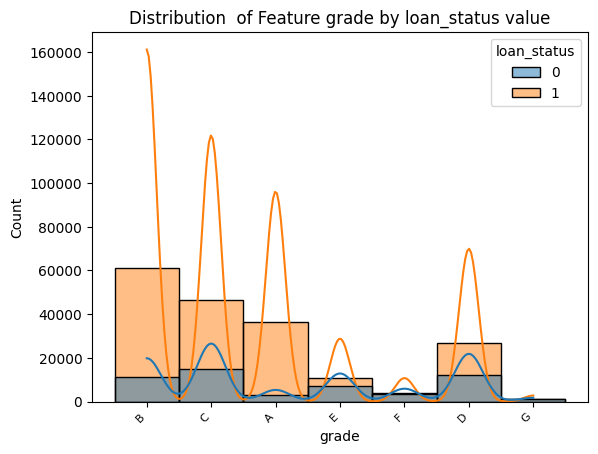

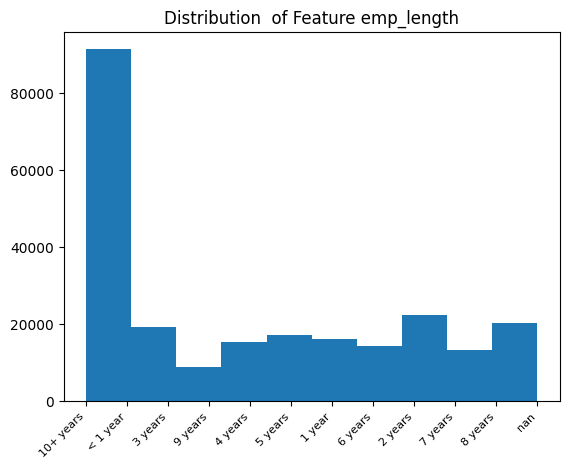

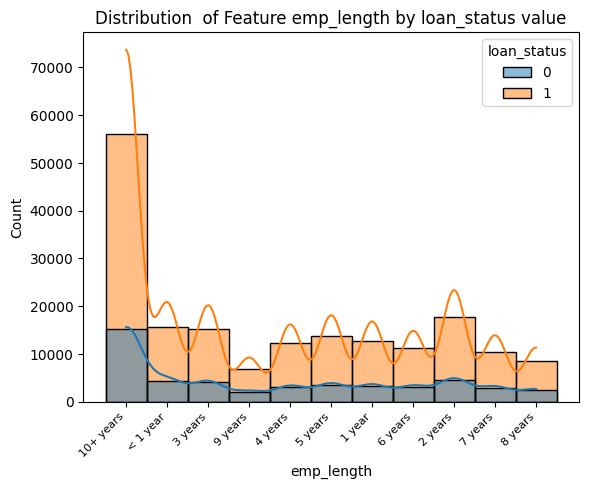

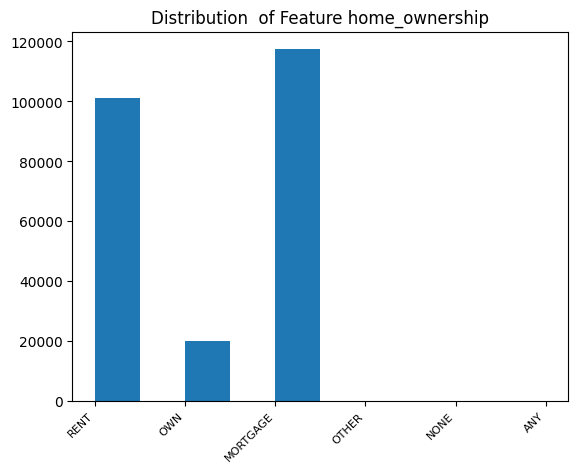

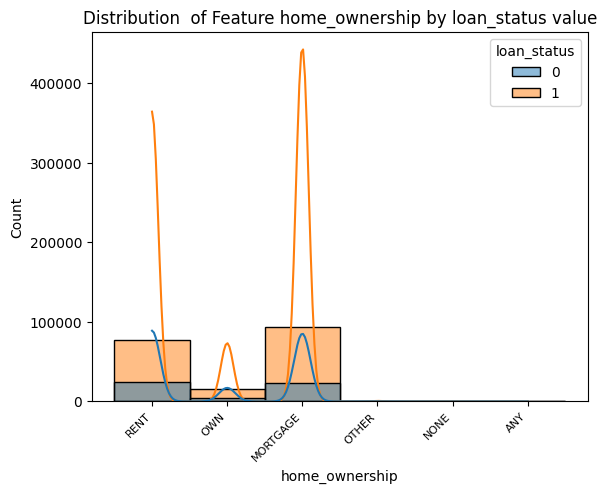

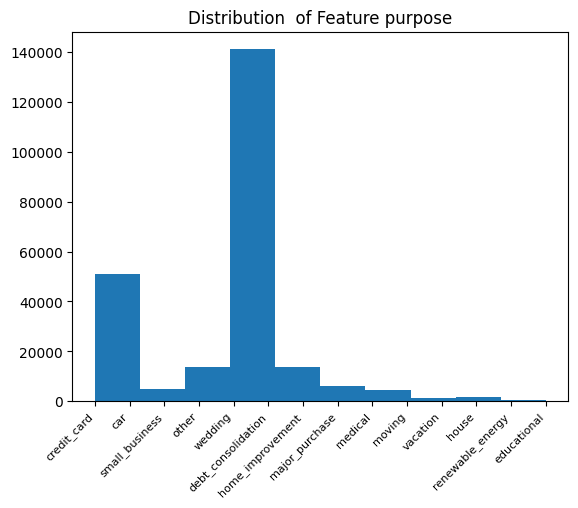

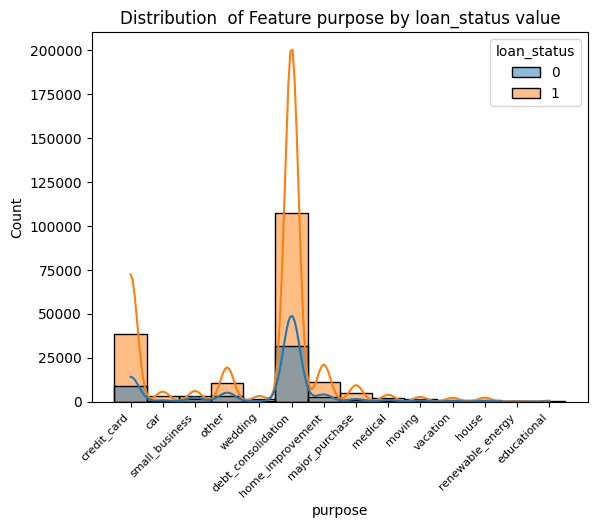

In [30]:
cat_col = ['term', 'grade', 'emp_length', 'home_ownership', 'purpose']

for column in cat_col:
    # Convert the column to string type before plotting
    plt.hist(df_credit[column].astype(str))
    plt.title(f'Distribution  of Feature {column}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.show()
    sns.histplot(data=df_credit, x=column, hue='loan_status', kde=True)
    plt.title(f'Distribution  of Feature {column} by loan_status value')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.show()

Conclusion :  

Pola datanya

Data kepada target seperti apa

## Datetime Feature

In [31]:
# Pick just year from earliest credit line
df_credit['earliest_cr_line'] =  pd.to_datetime(df_credit['earliest_cr_line'], format = "%b-%y").dt.year

# calculate year since last inquiry
df_credit['last_credit_pull_d'] = pd.to_datetime(df_credit['last_credit_pull_d'], format = "%b-%y").dt.year

df_credit[['earliest_cr_line', 'last_credit_pull_d']].describe()

,earliest_cr_line,last_credit_pull_d
count,238884.000000,238890.000000
mean,1997.710554,2015.040851
std,7.486129,1.162644
min,1969.000000,2007.000000
25%,1994.000000,2015.000000
50%,1999.000000,2015.000000
75%,2002.000000,2016.000000
max,2068.000000,2016.000000


We can see, there are two unique findings. First, from the 'earliest_cr_line', some of the data exceed current time, with max data of this feature is 2068. this value exceed current time. It happened because use 'unix' (epoch) as the origin or 1969, so there's no date before 1970. It means 2068 year was 1968.

Second, in 'yr_since_last_inq' feature have max value 2016. It means data is from 2007 - 2016

We can use 2016 as a filter because it can show how long since the borrower open an account and their last activity on "Current date" according to data.

In [32]:
df_credit[['earliest_cr_line', 'last_credit_pull_d']].describe()

,earliest_cr_line,last_credit_pull_d
count,238884.000000,238890.000000
mean,1997.710554,2015.040851
std,7.486129,1.162644
min,1969.000000,2007.000000
25%,1994.000000,2015.000000
50%,1999.000000,2015.000000
75%,2002.000000,2016.000000
max,2068.000000,2016.000000


In [33]:
def correct_year(year):
    """
    Corrects years that are likely incorrect (e.g., 2068)

    Args:
        year: The year to be corrected.

    Returns:
        Corrected year if necessary, otherwise the original year.
    """
    if year > 2016:
        return year - 100
    else:
        return year

df_credit['earliest_cr_line'] = df_credit['earliest_cr_line'].apply(correct_year)

In [34]:
df_credit[['earliest_cr_line', 'last_credit_pull_d']].describe()

,earliest_cr_line,last_credit_pull_d
count,238884.000000,238890.000000
mean,1997.493712,2015.040851
std,6.960065,1.162644
min,1946.000000,2007.000000
25%,1994.000000,2015.000000
50%,1999.000000,2015.000000
75%,2002.000000,2016.000000
max,2011.000000,2016.000000


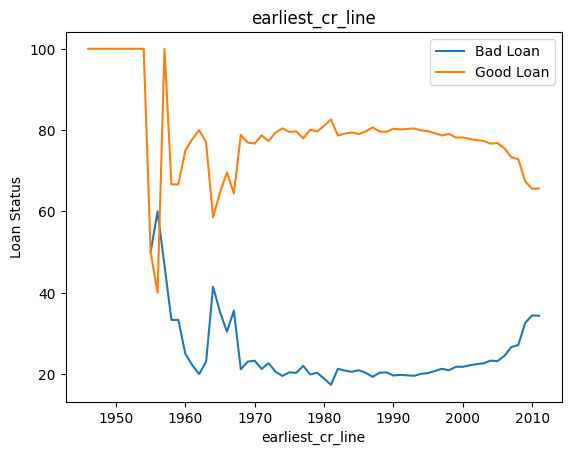

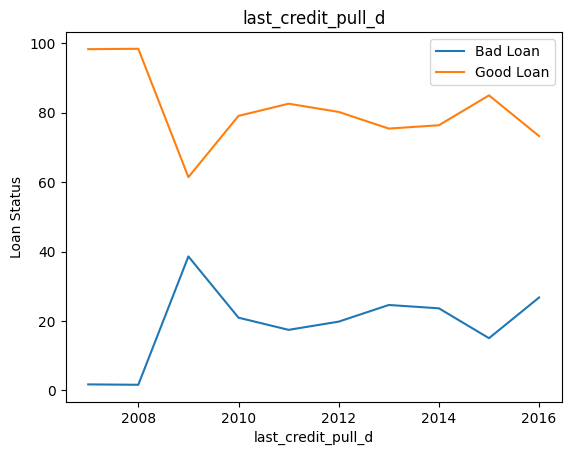

In [35]:
date_col = ['earliest_cr_line', 'last_credit_pull_d']

def date_chart(x):
    ratio = (df_credit.groupby(x)['loan_status'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('Loan Status') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_status'] == 0], x=x, y='Loan Status', label='Bad Loan')
    sns.lineplot(data=ratio[ratio['loan_status'] == 1], x=x, y='Loan Status', label='Good Loan')
    plt.title(x)
    plt.legend()  # Add a legend
    plt.show()

for cols in date_col:
    date_chart(cols)

#Data Preprocessing

## Feature Engineering

In [36]:
# Create new binary features for the presence of derogatory records
df_credit['has_mths_delinq'] = df['mths_since_last_delinq'].notnull().astype(int)
df_credit['has_mths_record'] = df['mths_since_last_record'].notnull().astype(int)
df_credit['has_mths_major_derog'] = df['mths_since_last_major_derog'].notnull().astype(int)


# Print the first few rows of the modified DataFrame
print(df_credit.head())

        id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   

   installment grade sub_grade emp_length  ... last_credit_pull_d  \
0       162.87     B        B2  10+ years  ...             2016.0   
1        59.83     C        C4   < 1 year  ...             2013.0   
2        84.33     C        C5  10+ years  ...             2016.0   
3       339.31     C        C1  10+ years  ...             2015.0   
5       156.46     A        A4    3 years  ...             2015.0   

   collections_12_mths_ex_med  mths_since_last_major_derog acc_now_delinq  \
0                         0.0                

In [37]:
# Calculate borrower record in years (assuming current year is 2016)
df_credit['earliest_cr_line'] = 2016 - df_credit['earliest_cr_line']
df_credit['last_credit_pull_d'] = 2016 - df_credit['last_credit_pull_d']

In [38]:
df_credit['emp_length'] = df_credit['emp_length'].replace({
    '< 1 year': '0',
    '1 year': '1',
    '2 years': '2',
    '3 years': '3',
    '4 years': '4',
    '5 years': '5',
    '6 years': '6',
    '7 years': '7',
    '8 years': '8',
    '9 years': '9',
    '10+ years': '10'
}).fillna('0').astype(int)

In [39]:
df_credit['term'] = df_credit['term'].str.replace(' months', '', regex=False)
df_credit['term'] = df_credit['term'].astype(int)

change object to integer in term

### One Hot Encoding

In [40]:
df_credit = pd.get_dummies(df_credit, columns=['grade', 'home_ownership', 'purpose'], dtype = int)

## Drop Redundant Features

'tot_cur_bal', 'total_rev_hi_lim' features have 25 percent missing values, this feature also redundant to features and 'annual_inc'.

'tot_coll_amt' also have 25 percent missing values, and this feature didnt have any correlation to target, so we can drop this.

'loan_amnt' and 'funded_amnt' redundant to 'funded_amnt_inv' so we can drop.

'revol_bal' irrelevant feature to target

'sub_grade' similiar to 'grade' feature

loan amount funded amount, funded amount inv also similiar,

dropping columns that already one hot encoded

In [41]:
df_credit.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 'loan_status',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'has_mths_delinq', 'has_mths_record',
       'has_mths_major_derog', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
 

In [42]:
df_credit = df_credit.drop (['funded_amnt', 'funded_amnt_inv', 'sub_grade', 'addr_state', 'mths_since_last_delinq',
               'mths_since_last_record', 'mths_since_last_major_derog',
               'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'revol_bal' ], axis = 1)

## Handling Missing Values

In [43]:
# Find rows with missing values
rows_with_missing_values = df_credit[df_credit.isna().any(axis=1)]

# Drop rows with missing values
df_credit_cleaned = df_credit.dropna()

# Print the number of rows dropped
print(f"Number of rows dropped: {len(rows_with_missing_values)}")

# Display the cleaned DataFrame
df_credit_cleaned.isna().sum()

Number of rows dropped: 366


,0
id,0
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,0
annual_inc,0
loan_status,0
dti,0
delinq_2yrs,0


# Modelling

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split data into features (X) and target variable (y)
X = df_credit_cleaned.drop('loan_status', axis=1)
y = df_credit_cleaned['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print(f"Before SMOTE, counts of classes in y_train: {Counter(y_train)}")
print(f"After SMOTE, counts of classes in y_train_resampled: {Counter(y_train_resampled)}")

# Proceed with model training and evaluation using X_train_resampled and y_train_resampled

Before SMOTE, counts of classes in y_train: Counter({1: 130462, 0: 36520})
After SMOTE, counts of classes in y_train_resampled: Counter({1: 130462, 0: 130462})


In [62]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(X_test.shape, y_test.shape)

(260924, 48) (260924,)
(71565, 48) (71565,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_resampled)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_resampled)

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)

In [66]:
eval_classification(logreg)

Precision (Test Set): 0.86
Precision (Train Set): 0.64
roc_auc (test-proba): 0.65
roc_auc (train-proba): 0.66


In [67]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_classifier.predict(X_test)

In [68]:
eval_classification(rf_classifier)

Precision (Test Set): 0.81
Precision (Train Set): 1.00
roc_auc (test-proba): 0.74
roc_auc (train-proba): 1.00


## After Standarization and Tuning

In [69]:
from  sklearn.preprocessing  import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train_resampled)
X_test_std = ss.transform(X_test)

In [70]:
def eval_classification_std(model):
    y_pred = model.predict(X_test_std)
    y_pred_train = model.predict(X_train_std)
    y_pred_proba = model.predict_proba(X_test_std)
    y_pred_proba_train = model.predict_proba(X_train_std)

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))


In [71]:
logregstd = LogisticRegression()
logregstd.fit(X_train_std, y_train_resampled)
y_pred_logregstd = logregstd.predict(X_test_std)

In [72]:
eval_classification_std(logregstd)

Precision (Test Set): 0.80
Precision (Train Set): 0.78
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.91


In [73]:
rf_classifierstd = RandomForestClassifier()
rf_classifierstd.fit(X_train_std, y_train_resampled)
y_pred_rfstd = rf_classifierstd.predict(X_test_std)

In [74]:
eval_classification_std(rf_classifierstd)

Precision (Test Set): 0.81
Precision (Train Set): 1.00
roc_auc (test-proba): 0.74
roc_auc (train-proba): 1.00


In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_stdr = scaler.fit_transform(X_train_resampled)
X_test_stdr = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Create GridSearchCV object with F1-score as scoring metric
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                          param_grid=param_grid,
                          cv=5,
                          scoring='precision')

# Fit GridSearchCV to the scaled data
grid_search.fit(X_train_stdr, y_train_resampled)

# Get the best model
best_logreg = grid_search.best_estimator_

eval_classification(best_logreg)

Precision (Test Set): 0.81
Precision (Train Set): 0.59
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.50


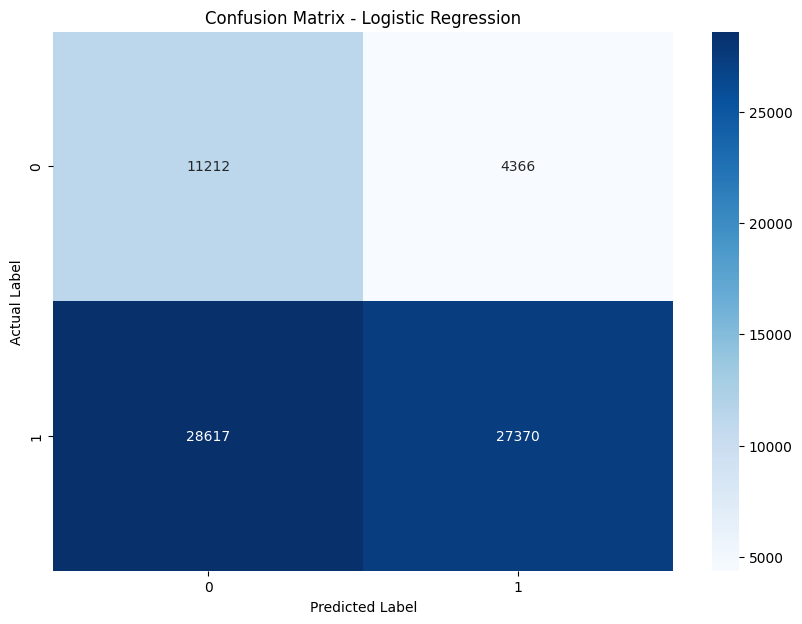

In [91]:
def create_confusion_matrix(y_test, y_pred, model_name):
  cm = confusion_matrix(y_test, y_pred_logreg)

  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  plt.show()

  return cm


cm_logreg = create_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')
